In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('raw_house_data.csv')

In [121]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,1.885226
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,9.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(6), int64(4), object(6)
memory 

In [123]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


### Are there duplicates

In [124]:
df.duplicated().any() == True

False

In [125]:
562/5000

0.1124

### Deal with NaNs

<AxesSubplot:xlabel='lot_acres', ylabel='Count'>

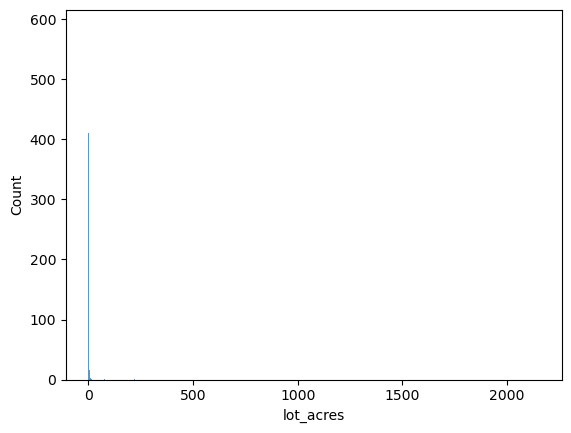

In [126]:
sns.histplot(data=df, x='lot_acres')

In [128]:
lot_acresmedian = df.lot_acres.median()
df['lot_acres']=df.lot_acres.fillna(lot_acresmedian)

<AxesSubplot:xlabel='fireplaces', ylabel='Count'>

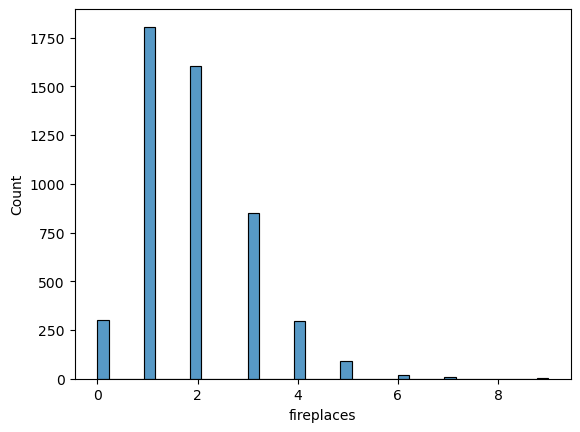

In [129]:
sns.histplot(data=df, x='fireplaces')

In [130]:
fpmean = np.round(df.fireplaces.mean())
df['fireplaces'] = df.fireplaces.fillna(fpmean)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(6), int64(4), object(6)
memory 

### Dealing with None strings

In [132]:
df[df == 'None'].count()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres             0
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64

<AxesSubplot:xlabel='HOA', ylabel='Count'>

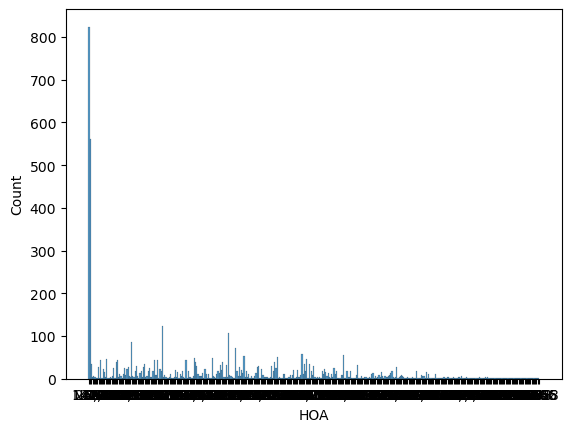

In [133]:
sns.histplot(data=df, x='HOA')

In [134]:
df.HOA[df.HOA =='None'] = np.nan

C:\Users\aimaz\AppData\Local\Temp\ipykernel_11592\881798665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HOA[df.HOA =='None'] = np.nan


In [135]:
t=[]
for i in df.HOA:
    t.append(float(str(i).replace(',','',1)))


In [136]:
df['HOA'] = np.array(t)

In [137]:
HOAmedian = df.HOA.median()
df['HOA'] = df['HOA'].fillna(HOAmedian)

In [138]:
df.kitchen_features.value_counts()

Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                                 1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                                                                                270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                       189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                                                                             181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                

In [139]:
df.kitchen_features[df.kitchen_features =='None'] = np.nan

C:\Users\aimaz\AppData\Local\Temp\ipykernel_11592\551495920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.kitchen_features[df.kitchen_features =='None'] = np.nan


In [140]:
df['kitchen_features'] = df['kitchen_features'].fillna(df.kitchen_features.value_counts().max())

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

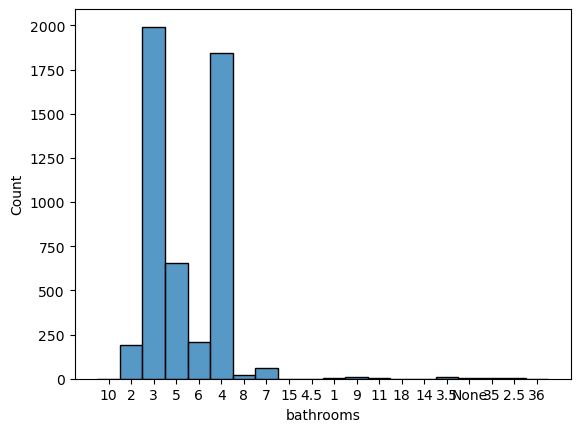

In [141]:
sns.histplot(data=df, x='bathrooms')

In [142]:
df.bathrooms[df.bathrooms =='None'] = np.nan

C:\Users\aimaz\AppData\Local\Temp\ipykernel_11592\2351757611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bathrooms[df.bathrooms =='None'] = np.nan


In [143]:
d=[]
for i in df.bathrooms:
    d.append(float(i))
bathmeanround = round(pd.Series(d).median())
df['bathrooms'] = pd.Series(d).fillna(bathmeanround)

<AxesSubplot:xlabel='sqrt_ft', ylabel='Count'>

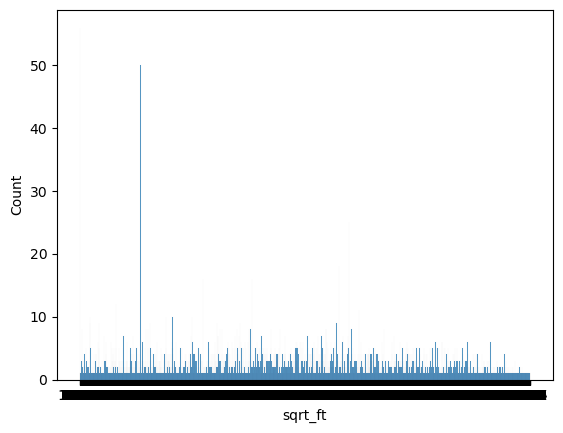

In [144]:
sns.histplot(data=df, x='sqrt_ft')

In [145]:
df.sqrt_ft[df.sqrt_ft =='None'] = np.nan

C:\Users\aimaz\AppData\Local\Temp\ipykernel_11592\2377459743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sqrt_ft[df.sqrt_ft =='None'] = np.nan


In [146]:
sqrt_ftmedian = df.sqrt_ft.median()
df['sqrt_ft'] = df['sqrt_ft'].fillna(sqrt_ftmedian)

<AxesSubplot:xlabel='garage', ylabel='Count'>

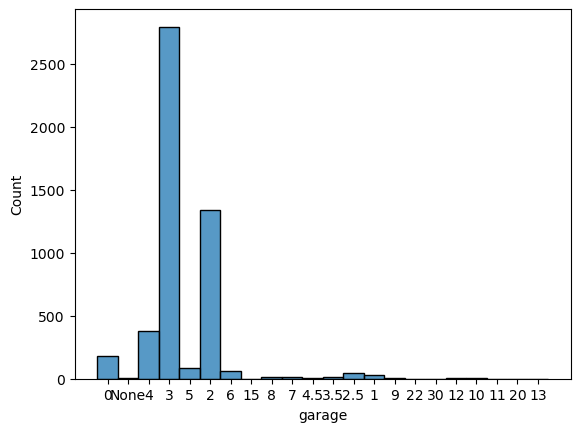

In [147]:
sns.histplot(data=df, x='garage')

In [148]:
df.garage[df.garage =='None'] = np.nan

C:\Users\aimaz\AppData\Local\Temp\ipykernel_11592\3090868425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.garage[df.garage =='None'] = np.nan


In [149]:
garagemedian = df.garage.median()
df['garage'] = df['garage'].fillna(garagemedian)

In [150]:
df.floor_covering.value_counts()

Carpet, Ceramic Tile                           1235
Carpet, Natural Stone                           579
Carpet, Ceramic Tile, Wood                      258
Ceramic Tile                                    247
Concrete                                        242
                                               ... 
Carpet, Concrete, Wood, Other: travertine         1
Concrete, Wood, Other: Mesquite wood floors       1
Carpet, Ceramic Tile, Wood, Other: Slate          1
Carpet, Other: brick pavers                       1
Concrete, Other: Cork                             1
Name: floor_covering, Length: 311, dtype: int64

In [151]:
df['floor_covering'] = df.floor_covering.replace('None','Carpet, Ceramic Tile ')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   float64
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   float64
dtypes: float64(8), int64(4), object(4)
memory 

In [153]:
df[df == 'None'].count()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [154]:
dt=[]
for i in df.lot_acres:
    dt.append(float(str(i)))

df['lot_acres'] = np.array(dt)
df.lot_acres

0       2154.00
1       1707.00
2       1707.00
3        636.67
4          3.21
         ...   
4995       4.98
4996       1.42
4997      12.06
4998       1.01
4999       4.16
Name: lot_acres, Length: 5000, dtype: float64

In [159]:
tdt=[]
for i in df.garage:
    tdt.append(float(str(i)))

df['garage'] = pd.Series(tdt)

In [162]:
tdtt=[]
for i in df.sqrt_ft:
    tdtt.append(float(str(i)))

df['sqrt_ft'] = pd.Series(tdtt)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         5000 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   float64
 10  sqrt_ft           5000 non-null   float64
 11  garage            5000 non-null   float64
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory

<AxesSubplot:>

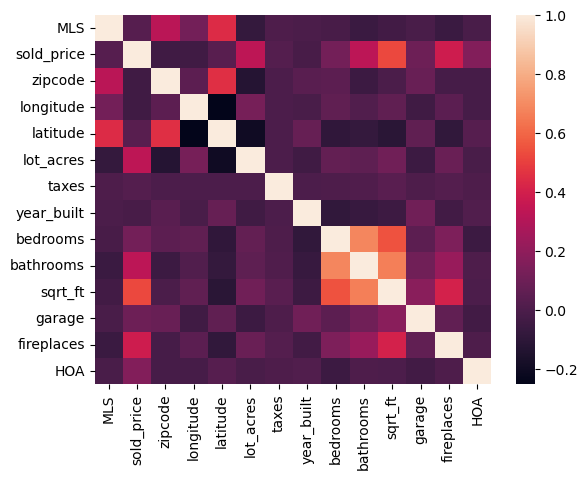

In [163]:
corr = df.corr()
sns.heatmap(corr)